In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [85]:
train = pd.read_csv("GoldPrices.csv")

In [86]:
train['date'] = pd.to_datetime(train.date, format = '%Y-%m-%d')

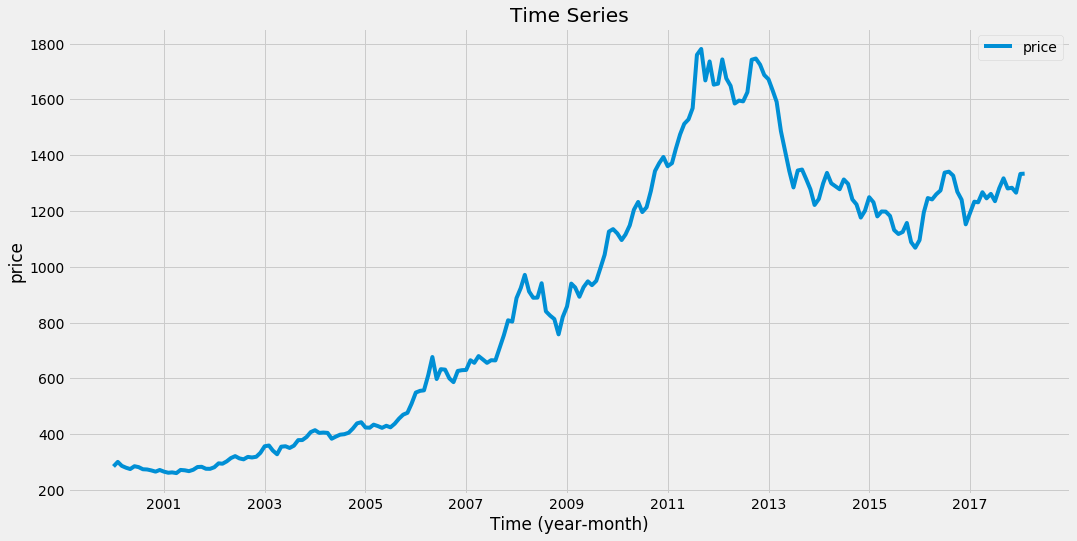

In [92]:
train.index = train['date']
ts = train['price']
plt.figure(figsize = (16,8))
plt.plot(ts)
plt.title("Time Series")
plt.xlabel("Time (year-month)")
plt.ylabel("price")
plt.legend(loc = 'best')

In [94]:
train.Timestamp = pd.to_datetime(train.date, format='%Y-%m-%d')
train.index = train.Timestamp

In [98]:
Train = train.ix['2000-01-01':'2016-12-01']
valid = train.ix['2016-12-01':'2018-02-01']

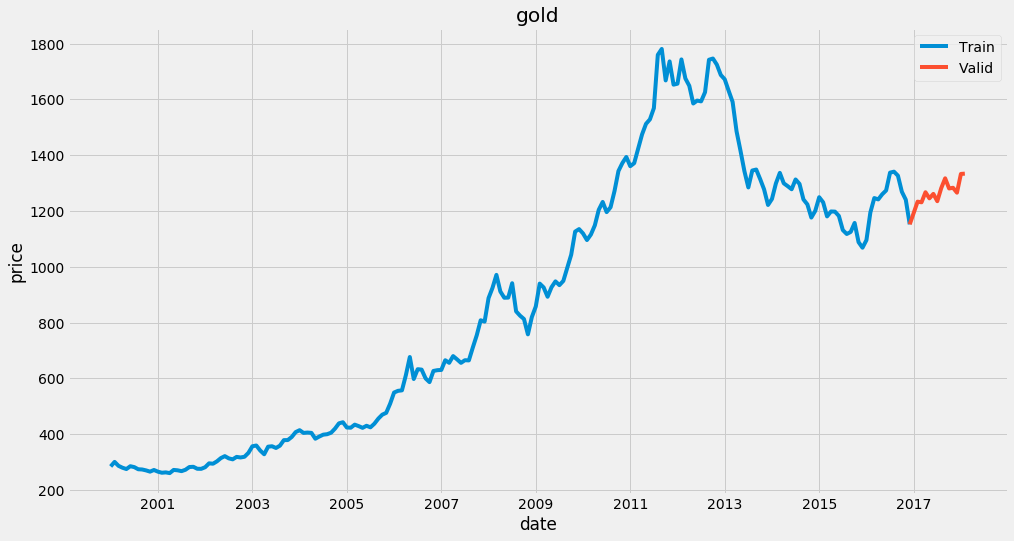

In [99]:
Train.price.plot(figsize = (15,8), title = 'gold', fontsize = 14, label = 'Train')
valid.price.plot(figsize = (15,8), title = 'gold', fontsize =14, label = 'Valid')
plt.xlabel('date')
plt.ylabel('price')
plt.legend(loc = 'best')

Text(0.5,1,'SARIMAX Model')

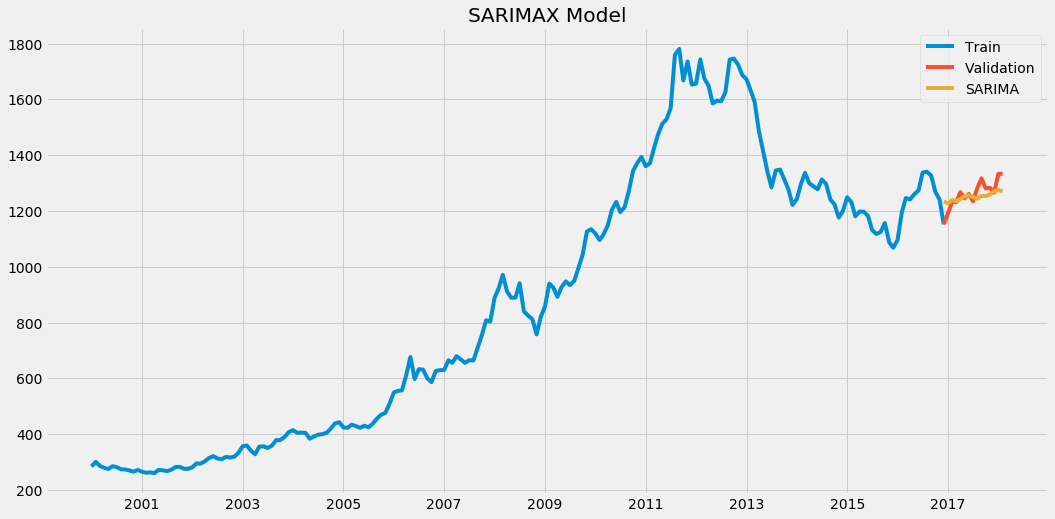

In [100]:
import statsmodels.api as sm
y_hat_avg = valid.copy()
fit1 = sm.tsa.statespace.SARIMAX(Train.price, order = (2,1,4), seasonal_order =(0,1,1,12)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2016-12-01", end="2018-02-01", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['price'], label = "Train")
plt.plot(valid.price, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [102]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.price, y_hat_avg.SARIMA))
print(rms)

31.59529458426296
